In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1>
<font color="#ff2e2e">
Color Space Conversion
</font>
</h1>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

path = '/content/drive/MyDrive/ColabNotebooks/FCV/HW3/images/Q1'

<h3><font color = "#079e05"> Convert RGB to CMYK and vice versa </font></h3>

In [ ]:
def rgb_to_cmyk(rgb_array):
  norm_rgb = rgb_array / 255
  k = (1 - max(norm_rgb))
  c = (1 - k - norm_rgb[0]) * 100
  m = (1 - k - norm_rgb[1]) * 100
  y = (1 - k - norm_rgb[2]) * 100

  return np.array([c, m, y, k*100], dtype=np.float64)

def cmyk_to_rgb(cmyk_array):
  norm_cmyk = cmyk_array / 100
  k = norm_cmyk[len(norm_cmyk)-1]
  r = (1 - k - norm_cmyk[0]) * 255
  g = (1 - k - norm_cmyk[1]) * 255
  b = (1 - k - norm_cmyk[2]) * 255

  return np.array([r, g, b], dtype=np.float64)

rgb_arr = np.array([50.0, 70.0, 130.0], dtype=np.float64)
cmyk_arr = rgb_to_cmyk(rgb_arr)
rgb = cmyk_to_rgb(cmyk_arr)

print('The original RGB arr is: ', rgb_arr)
print('The CMYK of given RGB is: ', cmyk_arr)
print('The RGB of given CMYK is: ', rgb)

The original RGB arr is:  [ 50.  70. 130.]
The CMYK of given RGB is:  [31.37254902 23.52941176  0.         49.01960784]
The RGB of given CMYK is:  [ 50.  70. 130.]


<h3><font color = "#079e05"> This function is used to plot your result </font></h3>

In [ ]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

<h3><font color = "#079e05"> BGR to YCbCr </font></h3>

In [2]:
def convert_to_ycbcr(image):
    '''
    Converts the color space of the input image to the YCbCr color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    
    return result

<h3><font color = "#079e05"> BGR to HSV </font></h3>

In [3]:
def convert_to_hsv(image):
    '''
    Converts the color space of the input image to the HSV color space.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''

    #############
    # Your code #
    #############
    result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
    return result

**bold text**<h3><font color = "#079e05"> Show the result </font></h3>

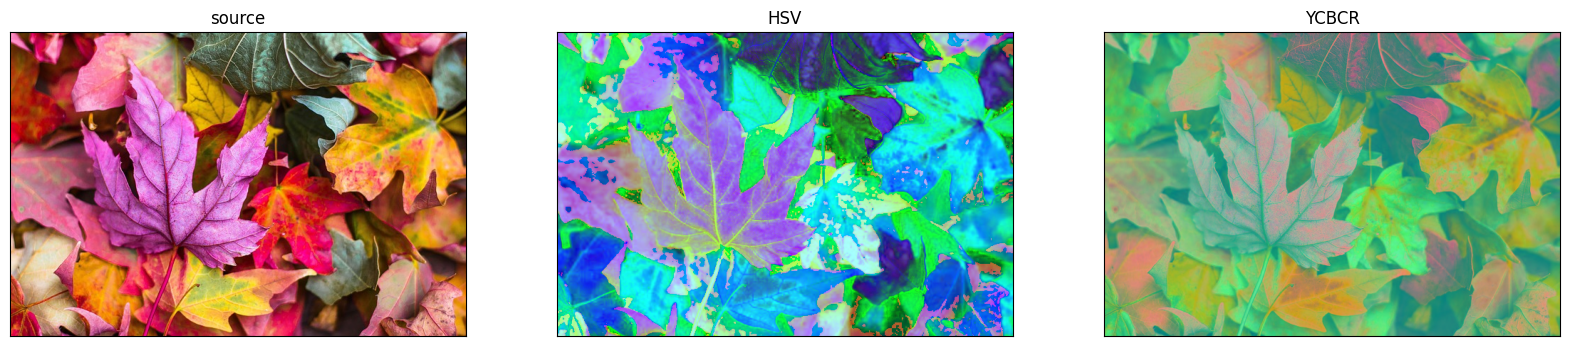

In [ ]:
image_list = []
image = cv2.imread(os.path.join(path, '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([convert_to_hsv(image), 'HSV', 'img'])
image_list.append([convert_to_ycbcr(image), 'YCBCR', 'img'])
plotter(image_list,1 , 3, True, 20, 10, '2A')

<h3><font color = "#079e05"> BGR to separate channels(H,S,V) </font></h3>

In [ ]:
def HSV_channels(image):
  hsv_result = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  return cv2.split(hsv_result)

**bold text**<h3><font color = "#079e05"> Show the result </font></h3>

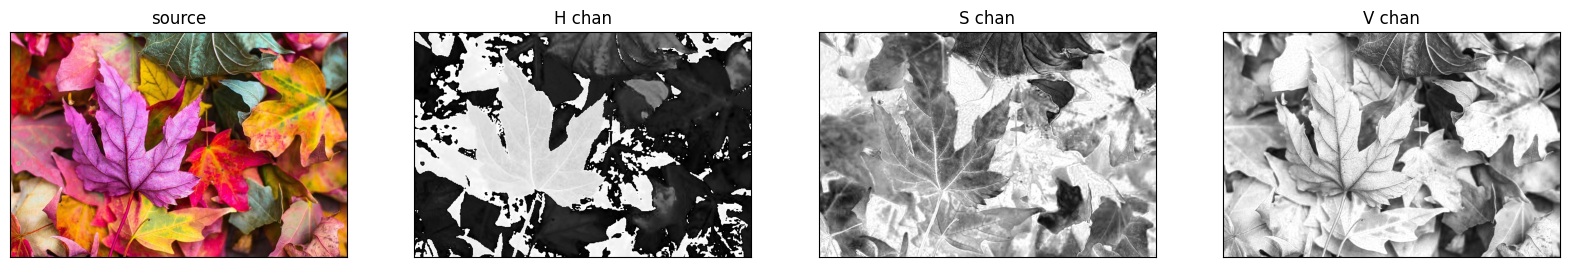

In [ ]:
image_list = []
image = cv2.imread(os.path.join(path, '1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
result_hsv_chn = HSV_channels(image)
image_list.append([result_hsv_chn[0], 'H chan', 'img'])
image_list.append([result_hsv_chn[1], 'S chan', 'img'])
image_list.append([result_hsv_chn[2], 'V chan', 'img'])
plotter(image_list,1 , 4, True, 20, 10, '2C')

<h1>
<font color="#ff2e2e">
Finding Differences
</font>
</h1>

In [ ]:
def dif(image1, image2):
    '''
    Creates a new image that differences between two input images are shown.
    
    Parameters:
        image1 (numpy.ndarray): The first input image.
        image2 (numpy.ndarray): The second input image.
    
    Returns:
        numpy.ndarray: The result difference image.
    '''
    #############
    # Your code #
    #############
    image1 = image1[0:916, 0:921]
    image2 = image2[0:916, 0:921]
    result = np.zeros((916, 921, 3), dtype=np.uint8)

    result[:, :, 0] = image1
    result[:, :, 1] = image2
    result[:, :, 2] = image2

    return result

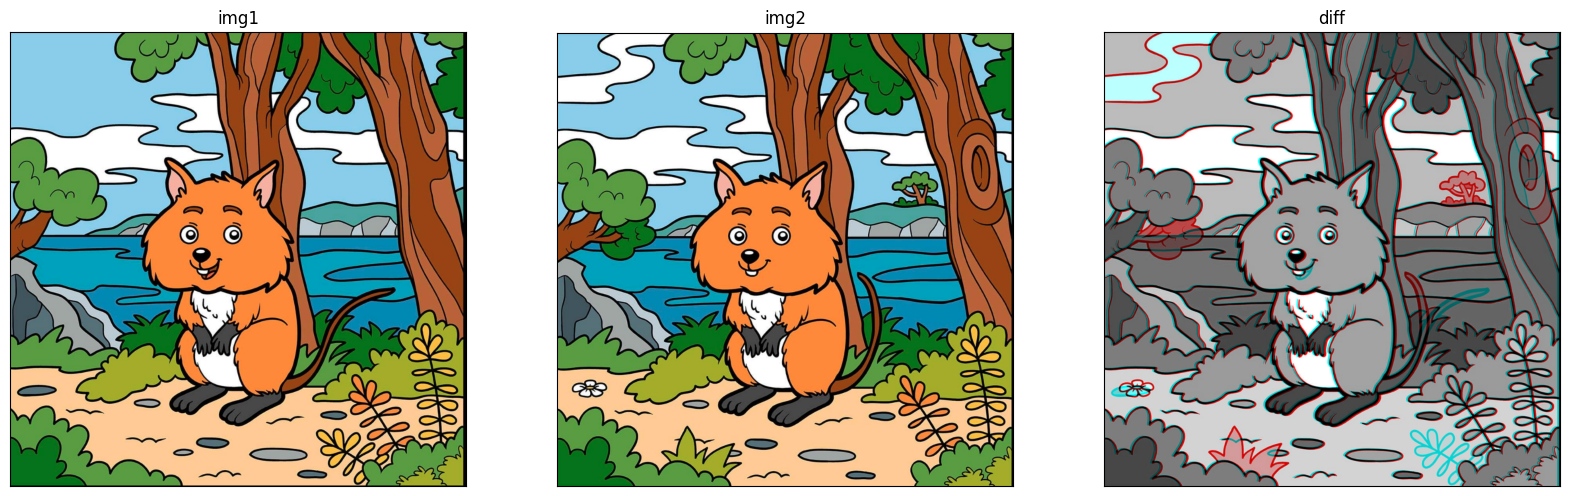

In [ ]:
image_list = []
image1 = cv2.imread(os.path.join(path, '2.png'))
image_list.append([cv2.cvtColor(image1, cv2.COLOR_BGR2RGB), 'img1', 'img'])
image2 = cv2.imread(os.path.join(path, '3.png'))
image_list.append([cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), 'img2', 'img'])

image1 = cv2.imread(os.path.join(path, '2.png'), cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(os.path.join(path, '3.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([dif(image1, image2), 'diff', 'img'])

plotter(image_list,1 , 3, True, 20, 10, '2B')